In [1]:
#we have the shap explainers and the utils file ready, we now need to compare the results of the different models
#we can add plotting utilities based on this file as well

from shap_utils.shap_utils import ShapUtils
all_ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-17/09-34-21-368888/checkpoints/last.ckpt'
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt'

util = ShapUtils('DNase', ckpt_path, percentage_background = 1/5000)
util.load_from_indices()
ccres = util.background_embed.shape[0]/util.dataset.cell_types


In [4]:
import shap_utils.shap_utils as shap_utils
print(shap_utils.NetNoEmbed)

<class 'shap_utils.shap_utils.NetNoEmbed'>


In [5]:
#now we can load the explainer from the pickle file
import pickle
# import os
# os.chdir('/data/leslie/sarthak/hyena/hyena-dna/shap_utils/')
# import sys
# import shap_utils.shap_utils as shap_utils
# sys.path.append('/data/leslie/sarthak/hyena/hyena-dna/shap_utils/')
with open('/data/leslie/sarthak/data/shap_explainer_171.0ccre_DNase.pkl', 'rb') as f:
    explainer = pickle.load(f)
#takes a little whiel to load

AttributeError: Can't get attribute 'NetNoEmbed' on <module 'shap_utils' (<_frozen_importlib_external.NamespaceLoader object at 0x2b37e00ce790>)>

In [12]:
shap_utils.NetNoEmbed

shap_utils.shap_utils.NetNoEmbed

In [6]:
# ccres is the number of ccre's for all cell types
print(ccres)
#now we will try explaining a handful of ccres in the train set

171.0


In [10]:
#let's try importing it by first copying the file over to shap_utils
import sys
sys.path.append('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/')
# import shap_utils
# print(shap_utils)
with open('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/shap_explainer_171.0ccre_DNase.pkl', 'rb') as f:
    explainer = pickle.load(f)

<module 'shap_utils' (<_frozen_importlib_external.NamespaceLoader object at 0x2b37e00ce790>)>


AttributeError: Can't get attribute 'NetNoEmbed' on <module 'shap_utils' (<_frozen_importlib_external.NamespaceLoader object at 0x2b37e00ce790>)>

In [11]:
shap_utils.NetNoEmbed

AttributeError: module 'shap_utils' has no attribute 'NetNoEmbed'

# I renamed some paths, now hopefully this will work


In [1]:
#we have the shap explainers and the utils file ready, we now need to compare the results of the different models
#we can add plotting utilities based on this file as well

from shap_analysis.shap_utils import ShapUtils
all_ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-17/09-34-21-368888/checkpoints/last.ckpt'
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt'

util = ShapUtils('DNase', ckpt_path, percentage_background = 1/5000)
util.load_from_indices()
ccres = util.background_embed.shape[0]/util.dataset.cell_types


In [4]:
#let's try importing it by first copying the file over to shap_utils
import sys
sys.path.append('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/')
import pickle
# import shap_utils
# print(shap_utils)
with open('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/shap_explainer_171.0ccre_DNase.pkl', 'rb') as f:
    explainer = pickle.load(f)
#it was import the shap_utils folder, had to rename things cuz it's actually a file that we want, don't ahv efolder and file same name, i get it now

In [5]:
#now let's just test a single ccre and all of its cell types
#use the first one in the set
util.test_input_indices

array([187941, 429493,  79489, ..., 676415, 643462, 193608])

In [9]:
a,b = util.dataset[0]
a.shape

torch.Size([1023])

In [18]:
#now we find all 161 outputs for this ccre
import torch
test_input_idx = util.test_input_indices[0] #187941 which is the ccre number we are looking at
a,b = util.dataset[test_input_idx]
print(a.shape)
#now embed it
a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
explained = explainer.shap_values(a_embed)
print(explained.shape)

torch.Size([1023])


AttributeError: 'NoneType' object has no attribute 'ones'

In [17]:
a_embed.shape
#it's an issue with pickle, doesn't reload it properly, as to be expected, but not much we can do, guess no saving out the explainer, but let's go ahead and save out a bunch of values

torch.Size([1, 1023, 128])

# testing code to run tonight

In [20]:
#we test the code to see if it runs, then run it on more of th edata

import shap
from shap_analysis.shap_utils import ShapUtils
import pickle
all_ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-17/09-34-21-368888/checkpoints/last.ckpt'
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt'

util = ShapUtils('DNase', ckpt_path, percentage_background = 1/1000)
util.load_from_indices()
ccres = util.background_embed.shape[0]/util.dataset.cell_types
a,b = util.dataset[0]
a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
explainer = shap.DeepExplainer(util.model, a_embed)

In [21]:
#note we normaly will use the util background
print(a_embed.shape)
print(util.background_embed.shape)

torch.Size([1, 1023, 128])
torch.Size([137816, 1023, 128])


In [23]:
#then we have th eexplainer, let's test what it can explain and what the output is
shap_values = explainer.shap_values(a_embed)
print(shap_values.shape)

(1, 1023, 128)


In [24]:
#we can do for all 161 cell types in the cCRE
util2 = ShapUtils('DNase_allcelltypes', all_ckpt_path, percentage_background = 1/1000)
util2.load_from_indices()
ccres = util2.background_embed.shape[0]
a,b = util2.dataset[0]
a_embed = util2.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
explainer = shap.DeepExplainer(util2.model, a_embed)
shap_values = explainer.shap_values(a_embed)
print(a_embed.shape)
print(util2.background_embed.shape) #the 856 is just 161*856 which gives us the 137816 from above!
print(len(shap_values))

Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400440653/work/torch/csrc/utils/tensor_new.cpp:261.)


torch.Size([1, 1023, 128])
torch.Size([856, 1023, 128])
161


In [26]:
print(shap_values[0].shape)
print(shap_values[1].shape)

(1, 1023, 128)
(1, 1023, 128)


In [28]:
import numpy as np
shap_mat = np.concatenate(shap_values, axis = 0) 
print(shap_mat.shape)

(161, 1023, 128)


In [29]:
#supposedly the explainer can be saved out on its own, let's try this
with open('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/test.exp', 'wb') as f:
    explainer.save(f)

AttributeError: 'DeepExplainer' object has no attribute 'model'

In [30]:
#now try it with the other approach
explainer.save('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/test2.exp')

TypeError: file must have a 'write' attribute

In [31]:
#we can do it for just the first 5 cCREs in the dataset
print(util.test_input_indices[:5])
print(util2.test_input_indices[:5]) #identical! PErfect!!

[535040 792101  71477 150966 380572]
[535040 792101  71477 150966 380572]


In [32]:
#the other thing to test is to see if explainer can take in multiple inputs at once
a,b = util.dataset[0]
a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
a_,b_ = util.dataset[1]
a_embed_ = util.backbone.backbone.embeddings.word_embeddings(a_.unsqueeze(0))
a_embed_all = torch.cat([a_embed, a_embed_], dim = 0)
print(a_embed_all.shape)

torch.Size([2, 1023, 128])


In [33]:
#now input this
shap_values = explainer.shap_values(a_embed_all)
print(len(shap_values))

161


In [34]:
print(shap_values[0].shape)

(2, 1023, 128)


In [35]:
#now let's time the difference
import time
start = time.time()
shap_values = explainer.shap_values(a_embed_all)
end = time.time()
print(end-start)

start = time.time()
shap_values_0 = explainer.shap_values(a_embed)
shap_values_1 = explainer.shap_values(a_embed_)
end = time.time()
print(end-start)

18.426308155059814
16.89426898956299


In [37]:
#now verify if they are thesame
print(np.max(shap_values[0][0] - shap_values_0[0][0]))
print(np.max(shap_values[0][1] - shap_values_1[0][0]))

#indeed they are, seems no rel difference if parallel or not, but we can do it in parallel if we want

0.0
0.0


In [38]:
print(np.concatenate(shap_values, axis = 0).shape) #161*2!!

(322, 1023, 128)


# testing speed

In [1]:
#now we will do this first for the cell type specific model
import shap
from shap_utils import ShapUtils
import torch
import numpy as np
from tqdm import tqdm
all_ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-17/09-34-21-368888/checkpoints/last.ckpt'
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt'

util = ShapUtils('DNase', ckpt_path, percentage_background = 1/50000)
util.load_from_indices()
ccres = util.background_embed.shape[0]/util.dataset.cell_types
print('explaining') #takes 1.5 minutes to reach here
explainer = shap.DeepExplainer(util.model, util.background_embed)
print(ccres) #also like 1.5 minutes
print(idx:=util.test_input_indices) #the 5 indices 

#now we analyze each of the 5 and all 161 cell types
output_ccres = []
for i in idx[:1]:
    for j in tqdm(range(161)): #2.5 minutes for each?? This is so slow!
        a,_ = util.dataset[i*161+j]
        a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
        # shap_values = explainer.shap_values(util.test_input[i:i+1])
        #these shap values will be
        shap_values = explainer.shap_values(a_embed)
        output_ccres.append(shap_values)
    #now concatenate them
    # output_ccres.append(shap_values)
#and then we concatenate them
# output_ccres = np.concatenate(output_ccres, axis = 0)
#

explaining
17.0
[668910 397875 467484 ... 676415 643462 193608]


  1%|▋                                                                                                                     | 1/161 [03:45<10:01:06, 225.41s/it]


KeyboardInterrupt: 

In [3]:
a_embed.shape

torch.Size([1, 1023, 128])

In [6]:
for i in idx[:1]:
    print(i) #the 668910th cCRE

668910


In [9]:
#now let's do the other model
util = ShapUtils('DNase_allcelltypes', all_ckpt_path, percentage_background = 1/50000)
util.load_from_indices()
print('explaining') #takes much less time
explainer = shap.DeepExplainer(util.model, util.background_embed)
print(ccres) #done with this within a minute
output_ccres = []
for i in idx[:1]:
    a,_ = util.dataset[i]
    a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
    shap_values = explainer.shap_values(a_embed)
print(shap_values[0].shape)
#done with this entire cCRE within 3 minutes!! Also takes up much less memory

explaining
17.0
(1, 1023, 128)


In [10]:
#concatenate them together
shap_values = np.concatenate(shap_values, axis = 0)
print(shap_values.shape)

(161, 1023, 128)


In [11]:
#now save it out
np.save(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/shap_values_{ccres}.npy', shap_values)

In [12]:
del util
util = ShapUtils('DNase', ckpt_path, percentage_background = 1/50000)
util.load_from_indices()
ccres = util.background_embed.shape[0]/util.dataset.cell_types
print('explaining') #takes 1.5 minutes to reach here
explainer = shap.DeepExplainer(util.model, util.background_embed)
print(ccres) #also like 1.5 minutes
print(idx:=util.test_input_indices) #the 5 indices 

#now we analyze each of the 5 and all 161 cell types
output_ccres = []
for i in idx[:1]:
    for j in tqdm(range(161)): #2.5 minutes for each?? This is so slow!
        a,_ = util.dataset[i*161+j]
        a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
        # shap_values = explainer.shap_values(util.test_input[i:i+1])
        #these shap values will be
        shap_values = explainer.shap_values(a_embed)
        output_ccres.append(shap_values)

explaining
17.0
[668910 397875 467484 ... 676415 643462 193608]


  0%|                                                                                                                                  | 0/161 [01:25<?, ?it/s]


KeyboardInterrupt: 

# testing to see if from scratch is much faster than using utils

In [1]:
import torch 

import argparse
import os
import sys
import yaml 
from tqdm import tqdm
import json 
sys.path.append('/data/leslie/sarthak/hyena/hyena-dna/')
from src.dataloaders.datasets.DNase_dataset import DNaseDataset
from src.tasks.decoders import SequenceDecoder
import pytorch_lightning as pl


# sys.path.append(os.environ.get("SAFARI_PATH", "."))

# from src.models.sequence.long_conv_lm import ConvLMHeadModel
from src.models.sequence.dna_embedding import DNAEmbeddingModel
# from transformers import AutoTokenizer, GPT2LMHeadModel
# from spacy.lang.en.stop_words import STOP_WORDS
from src.dataloaders.datasets.hg38_char_tokenizer import CharacterTokenizer
import torch.nn.functional as F

# d_output = 161

tokenizer = CharacterTokenizer( #make sure to fix the tokenizer too
                characters=['A', 'C', 'G', 'T', 'N', 'S', 'U', 'V', 'W', 'X', 'Y', 'Z'],
                model_max_length=1024 + 2,  # add 2 since default adds eos/eos tokens, crop later
                add_special_tokens=False,
                padding_side='left'
            )

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cfg = '/data/leslie/sarthak/hyena/hyena-dna/configs/evals/DNase.yaml'
cfg = yaml.load(open(cfg, 'r'), Loader=yaml.FullLoader)

train_cfg = cfg['train']  # grab section `train` section of config
model_cfg = cfg['model_config']  # grab the `model` section of config

d_output = train_cfg['d_output'] 

backbone = DNAEmbeddingModel(**model_cfg)

decoder = SequenceDecoder(model_cfg['d_model'], d_output=d_output, l_output=0, mode='pool')

ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt'
state_dict = torch.load(ckpt_path, map_location='cpu')  # has both backbone and decoder
        
# loads model from ddp by removing prexix to single if necessary
torch.nn.modules.utils.consume_prefix_in_state_dict_if_present(
    state_dict["state_dict"], "model."
)

model_state_dict = state_dict["state_dict"]

# need to remove torchmetrics. to remove keys, need to convert to list first
for key in list(model_state_dict.keys()):
    if "torchmetrics" in key:
        model_state_dict.pop(key)

# the state_dict keys slightly mismatch from Lightning..., so we fix it here
decoder_state_dict = {}
decoder_state_dict['output_transform.weight'] = model_state_dict.pop('decoder.0.output_transform.weight')
decoder_state_dict['output_transform.bias'] = model_state_dict.pop('decoder.0.output_transform.bias')

#now adjust the backbone
embedding = torch.nn.Embedding(20, 128)
backbone.backbone.embeddings.word_embeddings = embedding #again a hack

# now actually load the state dict to the decoder and backbone separately
decoder.load_state_dict(decoder_state_dict, strict=True)
backbone.load_state_dict(model_state_dict, strict=True)

decoder = decoder.to(device)
backbone = backbone.to(device)

In [2]:
#now we will load in the data, let's use the train as the background
ccre = DNaseDataset(max_length = 1024, split = 'train', tokenizer=tokenizer, rc_aug = False, tokenizer_name='char', add_eos='True', filter = True)

In [3]:
loader = torch.utils.data.DataLoader(ccre, batch_size=110, shuffle=True, num_workers=0)
batch = next(iter(loader))

In [4]:
#we need to modify net to take in the embeddings directly
class Net(torch.nn.Module):
    def __init__(self, backbone, decoder):
        super(Net, self).__init__()
        self.backbone = backbone  # Your pre-defined backbone
        self.decoder = decoder    # Your pre-defined decoder

    def forward(self, x):
        residual = None
        backbone = self.backbone
        # a_embed = backbone.backbone.embeddings.word_embeddings(x)
        a_embed = x #since we will embed it manually
        for layer in backbone.backbone.layers:
            a_embed, residual = layer(a_embed, residual)
        dropped = backbone.backbone.drop_f(a_embed)
        residual = (dropped + residual) if residual is not None else dropped
        hidden_states = backbone.backbone.ln_f(residual.to(dtype=backbone.backbone.ln_f.weight.dtype))
        
        # x = self.backbone(x)  # Pass input through backbone
        x = self.decoder(x)   # Pass backbone's output through decoder
        return x

In [5]:
inputs, targets = batch
background = inputs[:100]
test_input = inputs[100:]

#now embed the inputs
background_embed = backbone.backbone.embeddings.word_embeddings(background)
test_input_embed = backbone.backbone.embeddings.word_embeddings(test_input)
print(background_embed.shape) #seems about right

torch.Size([100, 1023, 128])


In [6]:
#so far everything took a minute up to this point
import shap
net = Net(backbone, decoder)
explainer = shap.DeepExplainer(net, background_embed) #12 seconds but much smaller

In [7]:
shap_values = explainer.shap_values(test_input_embed) #this should supposedly take forever, like 2.5 min * 10 = 25 minutes
#only took 1 minute, so then for 161 cell types we would expect 16 minutes...

In [9]:
test_input_embed.shape

torch.Size([10, 1023, 128])

In [10]:
#we most ceertainly have a bug!
#it's not the data loading, that's done basically instantly
for i in range(161):
    a,b = ccre[i]
#literally happened instantly, like iti does in the actual loop, what takes th elong time then? 

In [12]:
#now the real test
from tqdm import tqdm
for i in tqdm(range(161)):
    a,b = ccre[i]
    a_embed = backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
    shap_values = explainer.shap_values(a_embed) #takes roughly 6 seconds per iteration, so 10 for minute, and that means 161 will take 16 minutes
    #So I'm really not sure where the slowdown is coming from
#after 10 minutes it can finish over half of it, literally 9 minutes and over half, so not terrible, 20 min per cCRE on the higher end

  0%|                                                                                                                                  | 0/161 [00:00<?, ?it/s]

 53%|████████████████████████████████████████████████████████████████▋                                                        | 86/161 [09:07<07:57,  6.37s/it]


KeyboardInterrupt: 

# testing slowdown with shap utils

In [1]:
#let's test it with shap utils
import shap
from shap_analysis.shap_utils import ShapUtils
import torch
import numpy as np
from tqdm import tqdm
all_ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-17/09-34-21-368888/checkpoints/last.ckpt'
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt'

util = ShapUtils('DNase', ckpt_path, percentage_background = 1/50000)
util.load_from_indices()
ccres = util.background_embed.shape[0]/util.dataset.cell_types
print('explaining')
#should ideally take like a minute, maybe a bit more since we load torch and shap in both of them, but still fine
#it took 16.7 seconds?? That's a record!

explaining


In [3]:
util.background_embed.shape

torch.Size([2737, 1023, 128])

In [4]:
#let's just use the first 100 for shap background
explainer = shap.DeepExplainer(util.model, util.background_embed[:100]) #this took 3 seconds??

In [5]:
util.background_embed[:100].shape #exactly the shape we'd expect

torch.Size([100, 1023, 128])

In [6]:
#now we test it on 161 cCREs
from tqdm import tqdm
for i in tqdm(range(161)):
    a,b = util.dataset[i]
    a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
    shap_values = explainer.shap_values(a_embed) #this is somehow even faster?! So then why is my running so slow?

#let's just test this core with running the python script, also taking a similar amount of time

  9%|██████████▌                                                                                                              | 14/161 [01:42<17:52,  7.30s/it]


KeyboardInterrupt: 

# testing it with the explainer

In [2]:
#it might actually be the explainer, and havin gmore/less data points?
#let's test it with shap utils
import shap
import sys
print(sys.path)
from shap_analysis.shap_utils import ShapUtils
import torch
import numpy as np
from tqdm import tqdm
all_ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-17/09-34-21-368888/checkpoints/last.ckpt'
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt'

util = ShapUtils('DNase', ckpt_path, percentage_background = 1/50000)
util.load_from_indices()
ccres = util.background_embed.shape[0]/util.dataset.cell_types
print('explaining')
#should ideally take like a minute, maybe a bit more since we load torch and shap in both of them, but still fine
#it took 16.7 seconds?? That's a record!
util.background_embed.shape
#let's just use the first 100 for shap background
explainer = shap.DeepExplainer(util.model, util.background_embed) #this took 3 seconds??
#now we test it on 161 cCREs
for i in tqdm(range(161)):
    a,b = util.dataset[i]
    a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
    shap_values = explainer.shap_values(a_embed) #this is somehow even faster?! So then why is my running so slow?

#let's just test this core with running the python script, also taking a similar amount of time

['/lila/data/leslie/sarthak/hyena/hyena-dna/shap_analysis', '/data/leslie/sarthak/environments/hyena-dna/lib/python311.zip', '/data/leslie/sarthak/environments/hyena-dna/lib/python3.11', '/data/leslie/sarthak/environments/hyena-dna/lib/python3.11/lib-dynload', '', '/data/leslie/sarthak/environments/hyena-dna/lib/python3.11/site-packages']


ModuleNotFoundError: No module named 'shap_analysis'

# now we have them saved, let's load and find how to comapre them

In [1]:
# import shap
# import sys
# print(sys.path)
# from shap_analysis.shap_utils import ShapUtils
# import torch
import numpy as np
# from tqdm import tqdm
all_ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-17/09-34-21-368888/checkpoints/last.ckpt'
ckpt_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-02-09/17-38-16-568113/checkpoints/last.ckpt'

#now load in the data

DNase = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/shap_values_17.0ccre_DNase.npy')

In [2]:
DNase.shape #for one cCRE

(161, 1023, 128)

In [3]:
DNase_all = np.load('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/shap_values_17.0ccre_DNaseAllCelltype.npy')
DNase_all.shape #for one cCRE

(161, 1023, 128)

<Axes: >

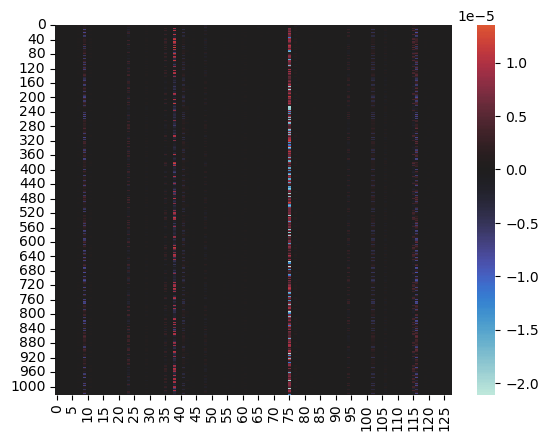

In [5]:
#just plot the first 3 cell types using seaborn
import seaborn as sns
sns.heatmap(DNase[0], center = 0)

<Axes: >

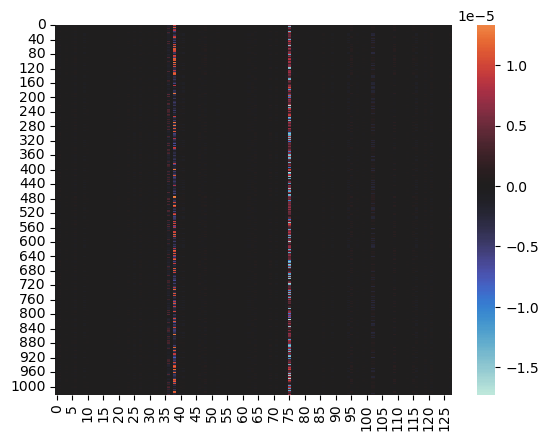

In [6]:
sns.heatmap(DNase_all[0], center = 0)

In [8]:
#why the same embedding layer? Does it mean nothing? Is that just the one that learned the most?
#let's look at the pca of all of the points, so for each sequence we get a single value, and this is done for all the cell types. 
from sklearn.decomposition import PCA
from tqdm import tqdm
DNase_pca = np.zeros((161,1023))
for i in tqdm(range(161)):
    pca = PCA(n_components=1)
    pca.fit(DNase[i])
    DNase_pca[i] = pca.transform(DNase[i]).squeeze()
print(DNase_pca.shape)
#that's actually stupidly quick

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 161/161 [00:00<00:00, 180.66it/s]

(161, 1023)


In [9]:
#let's repeat for the all cell types
DNase_all_pca = np.zeros((161,1023))
for i in tqdm(range(161)):
    pca = PCA(n_components=1)
    pca.fit(DNase_all[i])
    DNase_all_pca[i] = pca.transform(DNase_all[i]).squeeze()
print(DNase_all_pca.shape)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 161/161 [00:00<00:00, 206.12it/s]

(161, 1023)


Text(208.09722222222223, 0.5, 'cell type')

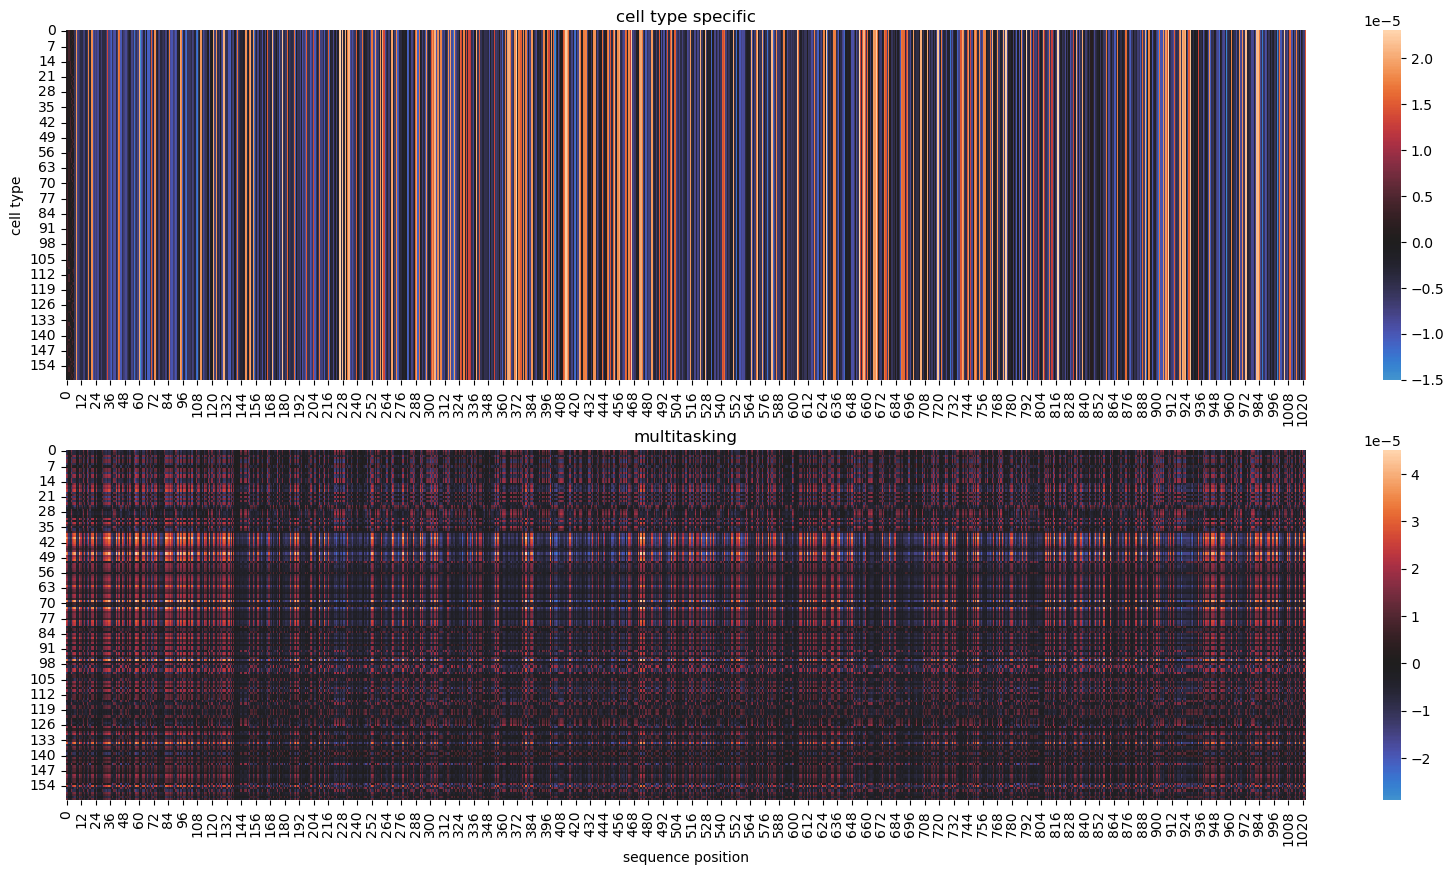

In [25]:
#that one was even faster, but barely, now let's do a heatmap with 2 subplots
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize = (20,10))
sns.heatmap(DNase_pca, ax = ax[0], center = 0)
sns.heatmap(DNase_all_pca, ax = ax[1], center = 0)
#add titles
ax[0].set_title('cell type specific')
ax[1].set_title('multitasking')
ax[1].set_xlabel('sequence position')
#set one y label
ax[0].set_ylabel('cell type')

In [15]:
#check to see if all the shap values are identical
np.all(DNase_all[0] == DNase_all[1]) #they are not, so then what's the difference?

False

In [14]:
print(DNase_all[0])
print(DNase_all[1])

[[ 1.28446551e-08 -6.26602628e-07  1.21880035e-07 ... -3.69365587e-08
   1.34126225e-07 -1.31050101e-07]
 [ 8.49966231e-09 -3.93900223e-07  1.08429603e-07 ... -4.20675406e-08
   8.00070836e-08 -2.90720585e-08]
 [-1.12655912e-10 -5.62600597e-08  1.41529497e-07 ...  5.20963503e-08
   3.46037936e-08  5.38006418e-07]
 ...
 [-1.11549268e-08  6.54528947e-07 -1.31993573e-07 ... -6.11594331e-08
  -1.70542933e-07 -1.26461089e-07]
 [ 1.13082814e-08 -5.19915829e-07  8.43700363e-08 ... -5.92841474e-08
   1.01869865e-07 -2.32939385e-07]
 [ 3.95551902e-09 -2.66412457e-07 -1.08058259e-07 ...  5.11944229e-08
   7.02452354e-08 -3.92986919e-07]]
[[-4.85075233e-08 -4.32492129e-07  1.25134974e-07 ... -3.62674091e-09
  -1.11643708e-07 -2.20988994e-07]
 [-3.20987681e-08 -2.71876871e-07  1.11325313e-07 ... -4.13054435e-09
  -6.65961295e-08 -4.90240382e-08]
 [ 4.25441626e-10 -3.88316863e-08  1.45309144e-07 ...  5.11525577e-09
  -2.88034325e-08  9.07236881e-07]
 ...
 [ 4.21263024e-08  4.51767363e-07 -1.3551857

In [16]:
print(DNase[0])
print(DNase[1]) #quite similar but not identical at all!

[[-3.23169408e-10  1.63634761e-09  1.98755643e-08 ... -5.73912189e-08
   1.84662987e-08  7.21664080e-08]
 [-2.74414513e-09 -1.13071668e-08  4.87987180e-08 ...  1.15230698e-07
   2.68924918e-08 -1.53422064e-07]
 [ 4.72087613e-09  5.19493746e-08 -9.91020528e-08 ...  1.84765540e-07
  -1.34901853e-07  2.43621827e-07]
 ...
 [-2.03264114e-10 -4.57945726e-09 -3.13183577e-08 ... -7.67329169e-08
   1.52164823e-08 -9.52559134e-08]
 [-3.15082471e-09 -1.28231745e-08  3.58879113e-08 ...  1.00638772e-07
   4.69072283e-08 -1.44246606e-08]
 [ 2.02023931e-09  1.48741881e-08 -2.41655762e-08 ...  7.30713410e-08
  -5.23827275e-08  4.98660810e-08]]
[[-3.23169408e-10  1.63634761e-09  1.98755643e-08 ... -5.73912189e-08
   1.84662987e-08  7.21664080e-08]
 [-2.74414513e-09 -1.13071668e-08  4.87987180e-08 ...  1.15230698e-07
   2.68924918e-08 -1.53422064e-07]
 [ 4.72087613e-09  5.19493746e-08 -9.91020528e-08 ...  1.84765540e-07
  -1.34901853e-07  2.43621827e-07]
 ...
 [-2.03264114e-10 -4.57945726e-09 -3.1318357

In [17]:
print(DNase_pca[0])
print(DNase_pca[1]) #literally identical, some bug for sure!

[ 1.62090598e-06 -2.49291893e-07  4.25113259e-06 ... -4.37594495e-06
 -6.97846742e-06  1.44963664e-05]
[ 1.62090769e-06 -2.49296598e-07  4.25113428e-06 ... -4.37593420e-06
 -6.97846939e-06  1.44963671e-05]


In [18]:
DNase_pca = np.zeros((161,1023))
for i in tqdm(range(161)):
    pca = PCA(n_components=1)
    pca.fit(DNase[i])
    DNase_pca[i] = pca.transform(DNase[i]).squeeze()
print(DNase_pca[0])
print(DNase_pca[1]) #literally identical, some bug for sure!

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 161/161 [00:00<00:00, 189.11it/s]

[ 1.62090598e-06 -2.49291893e-07  4.25113259e-06 ... -4.37594495e-06
 -6.97846742e-06  1.44963664e-05]
[ 1.62090769e-06 -2.49296598e-07  4.25113428e-06 ... -4.37593420e-06
 -6.97846939e-06  1.44963671e-05]


In [21]:
print(DNase[0,0,0:10])
print(DNase[1,0,0:10]) #No, it is exactly the same, let's check the script I used to save it
print(np.max(DNase[0] - DNase[1])) #they are not exactly identical, but for the most part they are... so the shap values are actually very similar...
#I honestly have no clue why, could it be mostly looking at the same inputs?

[-3.23169408e-10  1.63634761e-09  1.98755643e-08 -1.70902084e-08
 -7.59756436e-09 -4.95666086e-09  1.98498284e-08 -8.88876954e-08
 -2.35228415e-09 -3.51215363e-07]
[-3.23169408e-10  1.63634761e-09  1.98755643e-08 -1.70902084e-08
 -7.59756436e-09 -4.95666086e-09  1.98498284e-08 -8.88876954e-08
 -2.35228415e-09 -3.51215363e-07]
1.9593970677078687e-06


(array([1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 3.00000e+00,
        0.00000e+00, 2.00000e+00, 3.00000e+00, 3.00000e+00, 1.00000e+00,
        1.00000e+00, 5.00000e+00, 4.00000e+00, 2.00000e+00, 6.00000e+00,
        7.00000e+00, 7.00000e+00, 1.40000e+01, 1.90000e+01, 4.30000e+01,
        1.30731e+05, 1.90000e+01, 1.40000e+01, 7.00000e+00, 7.00000e+00,
        6.00000e+00, 2.00000e+00, 4.00000e+00, 5.00000e+00, 1.00000e+00,
        1.00000e+00, 3.00000e+00, 3.00000e+00, 2.00000e+00, 0.00000e+00,
        3.00000e+00, 1.00000e+00, 0.00000e+00, 0.00

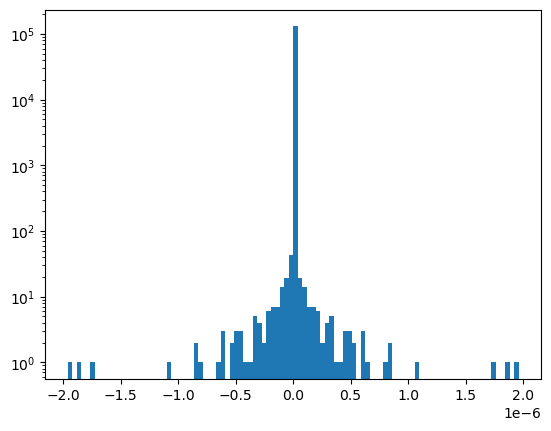

In [23]:
#let's plot the distribution of the difference as a histogram
# plt.hist(DNase[0].flatten() - DNase[1].flatten(), bins = 100)
#log axes
plt.hist(DNase[0].flatten() - DNase[1].flatten(), bins = 100, log = True)
#there are indeed differences, they're just tin

In [27]:
#let's try mean isntead of pca
DNase_mean = np.mean(DNase, axis = 2)
DNase_all_mean = np.mean(DNase_all, axis = 2)
print(DNase_mean.shape, DNase_all_mean.shape)

(161, 1023) (161, 1023)


<Axes: >

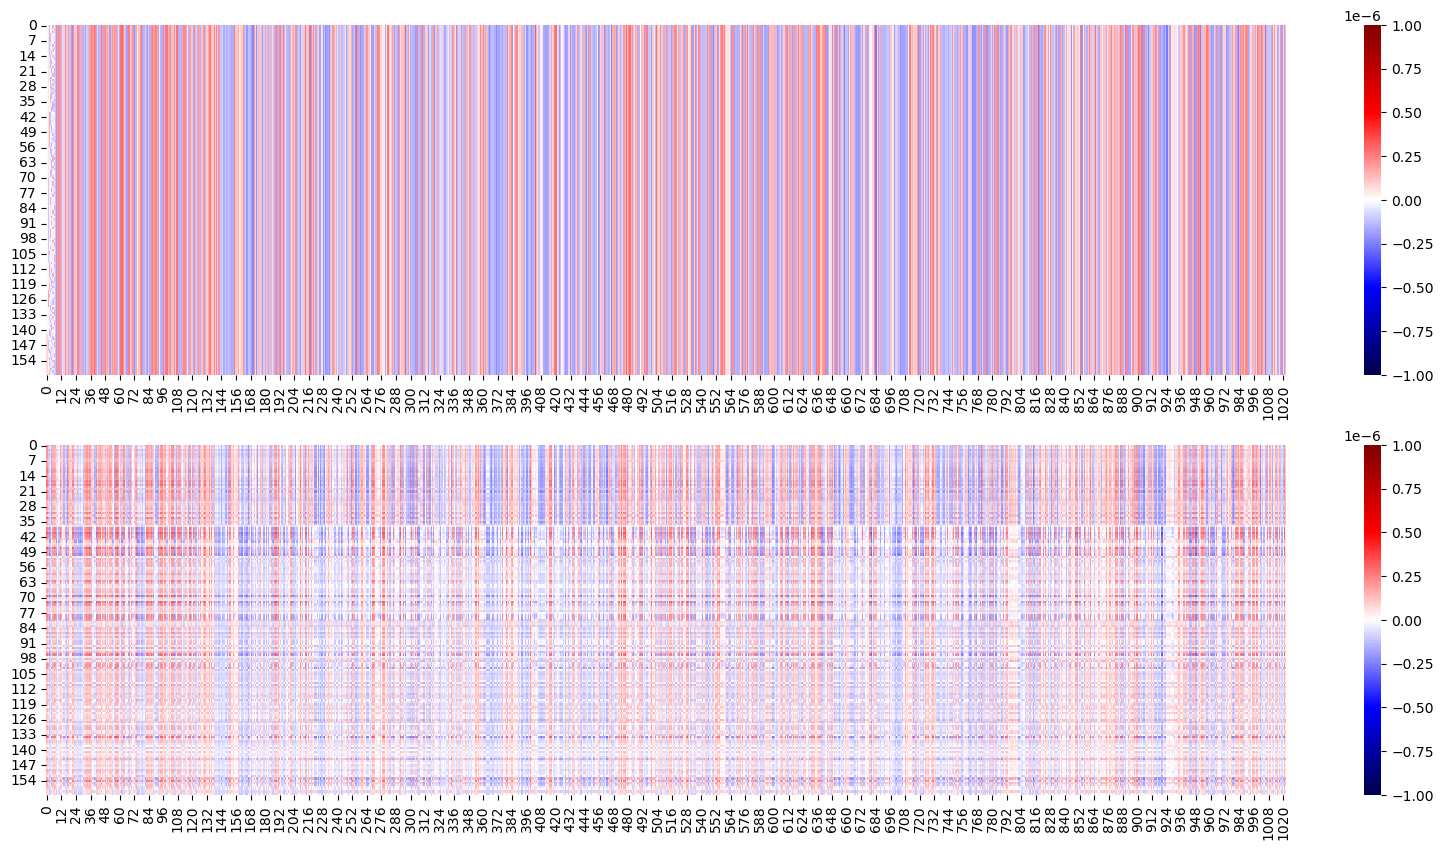

In [91]:
#Same heatmap
fig, ax = plt.subplots(2,1, figsize = (20,10))
sns.heatmap(DNase_mean, ax = ax[0], center = 0, cmap = 'seismic', vmax = 1e-6, vmin = -1e-6)
sns.heatmap(DNase_all_mean, ax = ax[1], center = 0, cmap = 'seismic', vmax = 1e-6, vmin = -1e-6)
#add titles

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


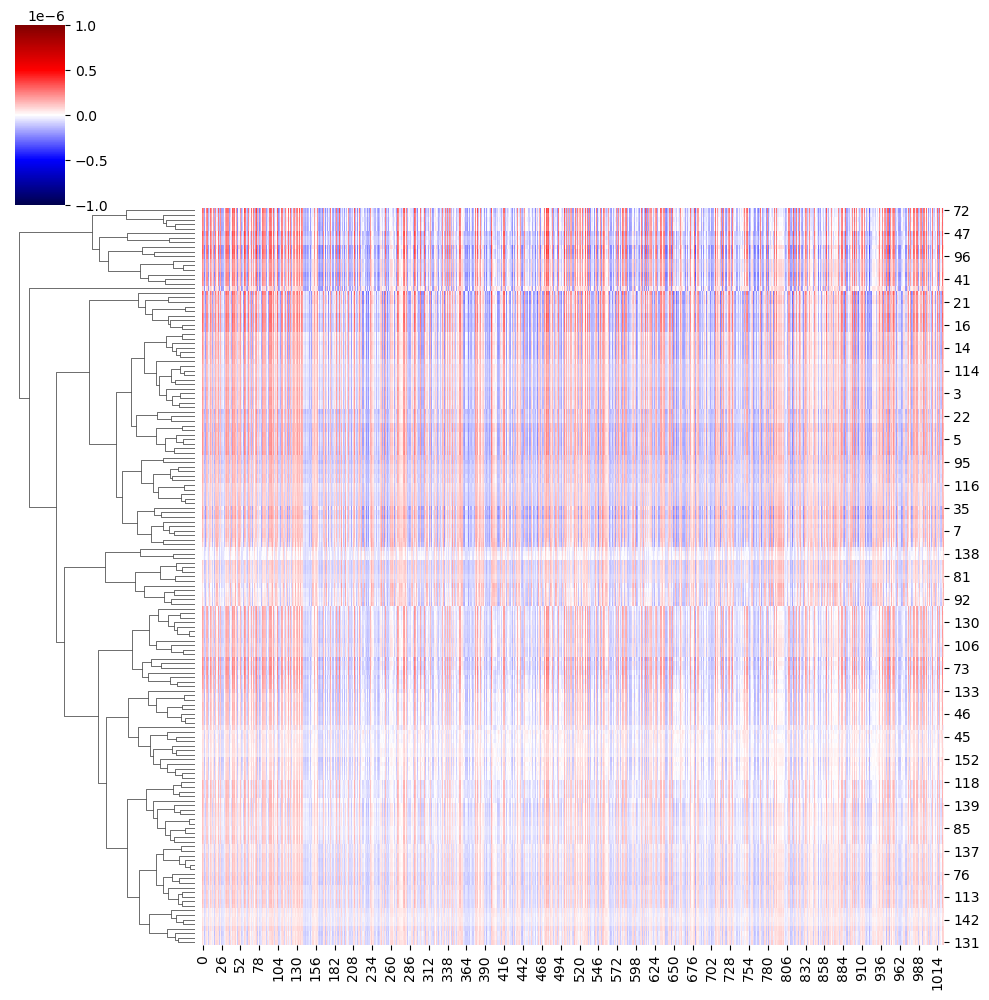

In [92]:
#now use cluster map
#only select the columns
sns.clustermap(DNase_all_mean, center = 0, cmap = 'seismic', vmax = 1e-6, vmin = -1e-6, col_cluster = False)

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
Attempting to set identical low and high xlims makes transformation singular; automatically expanding.


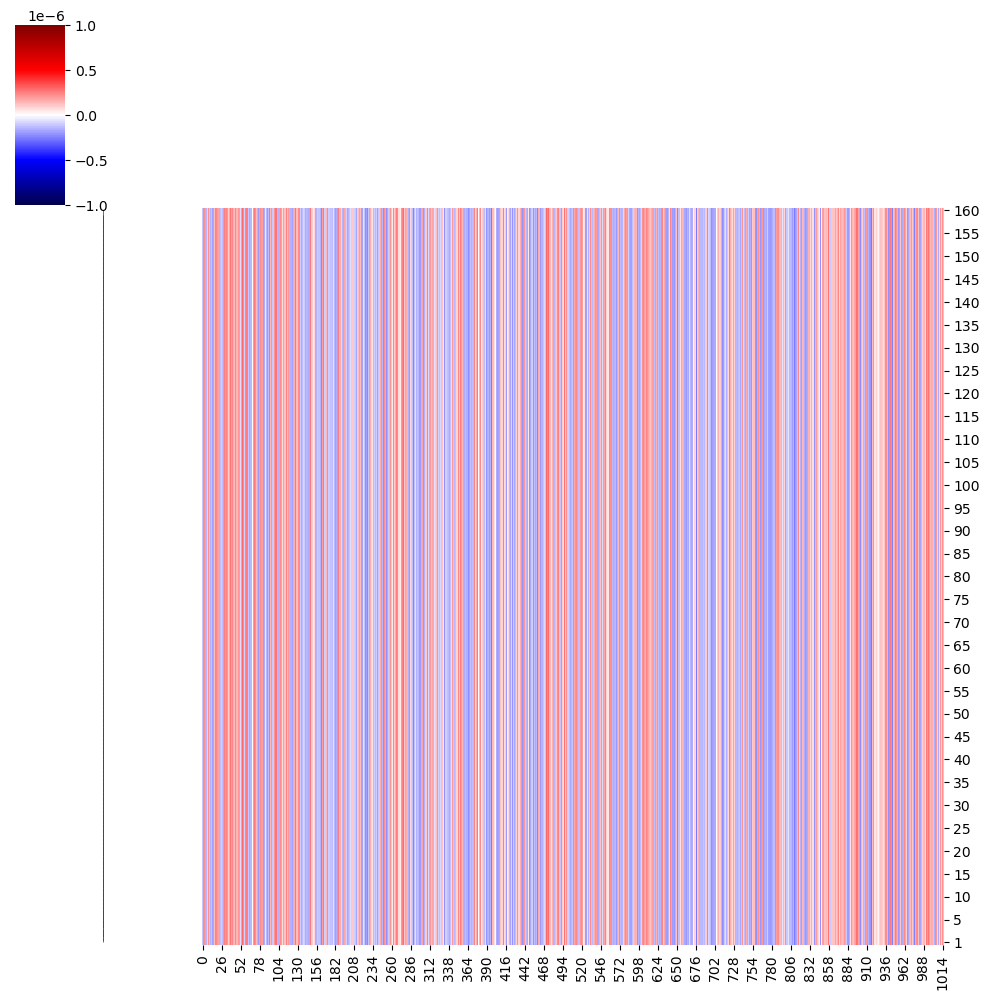

In [95]:
#
sns.clustermap(DNase_mean[:,7:], center = 0, cmap = 'seismic', vmax = 1e-6, vmin = -1e-6, col_cluster = False)

In [94]:
DNase_mean.shape

(161, 1023)

In [26]:
#one other option, let's do it after max, not pca
DNase_max = np.max(DNase, axis = 2)
print(DNase_max.shape)

(161, 1023)


In [32]:
#what about the actual outputs of this model
#import the shap utils and let's see
from shap_analysis.shap_utils import ShapUtils
util = ShapUtils('DNase', ckpt_path, percentage_background = 1/50000)
util.load_from_indices()
idx=util.test_input_indices
print(idx)

[668910 397875 467484 ... 676415 643462 193608]


In [34]:
# idx[:1] #668910
target_list = []
for i in range(161):
    a,b = util.dataset[668910*161+i]
    # a_embed = util.backbone.backbone.embeddings.word_embeddings(a.unsqueeze(0))
    # print(a_embed.shape)
    # print(util.model(a_embed).shape)
    target_list.append(b)
print(len(target_list))

161


In [42]:
target_list

[tensor([0.5824]),
 tensor([1.0989]),
 tensor([-0.1824]),
 tensor([0.2989]),
 tensor([0.2371]),
 tensor([0.4739]),
 tensor([0.0701]),
 tensor([-0.0019]),
 tensor([0.5145]),
 tensor([0.6250]),
 tensor([0.3933]),
 tensor([1.0943]),
 tensor([0.4893]),
 tensor([0.7603]),
 tensor([0.5717]),
 tensor([0.5694]),
 tensor([0.3284]),
 tensor([0.5529]),
 tensor([-0.8820]),
 tensor([0.5819]),
 tensor([0.1509]),
 tensor([0.2979]),
 tensor([-0.4074]),
 tensor([0.4949]),
 tensor([0.2865]),
 tensor([-0.0057]),
 tensor([1.2586]),
 tensor([0.6732]),
 tensor([0.4755]),
 tensor([1.6677]),
 tensor([0.1721]),
 tensor([0.5795]),
 tensor([0.5820]),
 tensor([0.8864]),
 tensor([-0.3703]),
 tensor([1.2199]),
 tensor([-0.4783]),
 tensor([0.0060]),
 tensor([-0.6661]),
 tensor([0.0825]),
 tensor([-0.8167]),
 tensor([-0.3722]),
 tensor([-0.0292]),
 tensor([-0.6312]),
 tensor([-0.1356]),
 tensor([-1.1929]),
 tensor([-0.5742]),
 tensor([-10.]),
 tensor([-10.]),
 tensor([-0.4811]),
 tensor([0.3075]),
 tensor([0.1325]),


In [43]:
real_target_list = []
for i in target_list:
    real_target_list.append(i[0].item())

variance: 2.417423963546753


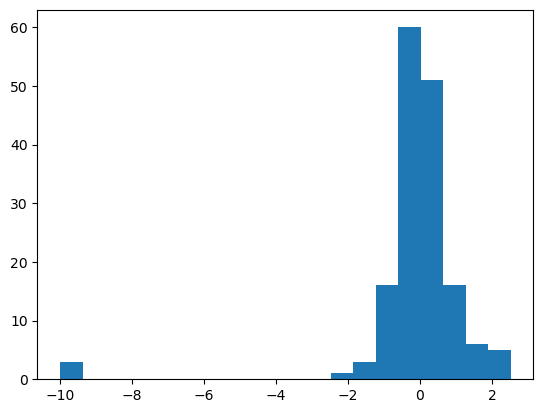

In [48]:
plt.hist(real_target_list, bins = 20)
#add text showing the variance
print(f'variance: {np.var(target_list)}')
#we can see that this one is pretty centered around 0, not many that are -10, so maybe this one is lower variance?

In [49]:
util.dataset.cell_dnase_levels.shape

(1063878, 1205)

In [50]:
util.dataset.filtered_indices

{0: 0,
 1: 6,
 2: 7,
 3: 11,
 4: 13,
 5: 14,
 6: 15,
 7: 17,
 8: 18,
 9: 19,
 10: 20,
 11: 21,
 12: 22,
 13: 23,
 14: 24,
 15: 25,
 16: 26,
 17: 27,
 18: 28,
 19: 29,
 20: 31,
 21: 33,
 22: 34,
 23: 35,
 24: 36,
 25: 38,
 26: 39,
 27: 48,
 28: 50,
 29: 54,
 30: 55,
 31: 56,
 32: 60,
 33: 61,
 34: 63,
 35: 64,
 36: 68,
 37: 69,
 38: 70,
 39: 71,
 40: 72,
 41: 73,
 42: 74,
 43: 75,
 44: 76,
 45: 77,
 46: 78,
 47: 79,
 48: 84,
 49: 85,
 50: 86,
 51: 87,
 52: 88,
 53: 89,
 54: 90,
 55: 91,
 56: 96,
 57: 100,
 58: 101,
 59: 102,
 60: 103,
 61: 105,
 62: 106,
 63: 107,
 64: 108,
 65: 109,
 66: 113,
 67: 114,
 68: 115,
 69: 116,
 70: 120,
 71: 121,
 72: 125,
 73: 126,
 74: 127,
 75: 128,
 76: 129,
 77: 130,
 78: 131,
 79: 132,
 80: 133,
 81: 134,
 82: 136,
 83: 138,
 84: 140,
 85: 141,
 86: 144,
 87: 145,
 88: 147,
 89: 151,
 90: 152,
 91: 153,
 92: 154,
 93: 155,
 94: 156,
 95: 157,
 96: 159,
 97: 160,
 98: 164,
 99: 165,
 100: 172,
 101: 178,
 102: 184,
 103: 189,
 104: 196,
 105: 206,
 106

In [55]:
filtered_idx_list = []
for key in util.dataset.filtered_indices:
    print(util.dataset.filtered_indices[key])
    filtered_idx_list.append(util.dataset.filtered_indices[key])
#this prints out the indexes that we want, let's go into it

0
6
7
11
13
14
15
17
18
19
20
21
22
23
24
25
26
27
28
29
31
33
34
35
36
38
39
48
50
54
55
56
60
61
63
64
68
69
70
71
72
73
74
75
76
77
78
79
84
85
86
87
88
89
90
91
96
100
101
102
103
105
106
107
108
109
113
114
115
116
120
121
125
126
127
128
129
130
131
132
133
134
136
138
140
141
144
145
147
151
152
153
154
155
156
157
159
160
164
165
172
178
184
189
196
206
216
218
224
272
315
331
386
387
390
395
421
428
431
433
436
446
482
488
523
531
532
556
564
584
603
606
608
621
625
641
656
664
682
687
697
704
733
782
830
863
874
884
896
932
997
1018
1024
1033
1101
1105
1108
1133
1143
1156
1171


In [57]:
dnase_filtered = util.dataset.cell_dnase_levels[:,filtered_idx_list]
print(dnase_filtered.shape) #now this is the right shape

(1063878, 161)


In [60]:
#let's calculate the variance of every column
variance_list = []
for i in range(dnase_filtered.shape[0]):
    variance_list.append(np.var(dnase_filtered[i,:]))
print(len(variance_list)) #only takes like 13 seconds, this is great!

1063878


In [61]:
#we can probably do this faster using numpy
variance_list = np.var(dnase_filtered, axis = 1)
print(variance_list.shape) #takes 1/13 times as long

(1063878,)


Text(0.5, 1.0, 'variance of cell type specific DNase levels')

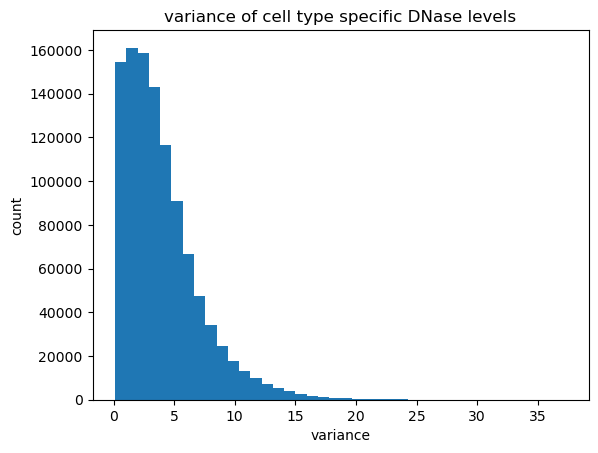

In [65]:
plt.hist(variance_list, bins = 40)
plt.xlabel('variance')
plt.ylabel('count')
plt.title('variance of cell type specific DNase levels')

In [66]:
idx

array([668910, 397875, 467484, ..., 676415, 643462, 193608])

In [76]:
idx[0]

668910

In [67]:
#no need to save the variance list, but here's how we can easily access the rows to find variance
seq_idx = int(idx[0]/util.dataset.cell_types)
cCRE_id = util.dataset.array[seq_idx][0] #get the id from the array
row = util.dataset.cCRE_dict[cCRE_id]
#now we can calculate the variance using this data
print(np.var(dnase_filtered[row,:])) #this is the variance of the DNase levels for this cCRE
#can add this to the utils file called like get_variance or something, which finds the variance for that ccre

0.47168346171145437


In [71]:
print(real_target_list[0:3])
print(dnase_filtered[row,0:3])
#nope these are certainly not identical...

[0.5824139714241028, 1.0989477634429932, -0.18235397338867188]
[0.26939384 0.40626694 0.5000555 ]


In [75]:
print(len(real_target_list))
print(dnase_filtered.shape[1]) #yeah it's the same length

161
161


In [81]:
#let's make sure our subset lists are identical
#go step by step
# tempidx = idx.copy()
# idx = idx[0]
idx=idx*161 #this is our idx
idx #times 161 because remember go across cell types

107694510

In [82]:
#first let's make sure our column information is identical
#here we are not adding anything, so it should be fine to just use the 0 value, should be column 0
idx%util.dataset.cell_types #as expected it's 0

0

In [ ]:
#first make sure that the calculations make sense
seq_idx = int(idx/util.dataset.cell_types)

In [83]:
#oh we found our error, we shoudl be calculating it where we take idx and accoutn for each ccre having many cell types
seq_idx = int(idx/util.dataset.cell_types)
cCRE_id = util.dataset.array[seq_idx][0] #get the id from the array
row = util.dataset.cCRE_dict[cCRE_id]
#now we can calculate the variance using this data
print(np.var(dnase_filtered[row,:])) #identical

2.4174239829882396
